In [ ]:
## Replace this with your name and Section

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [33]:
# Add the boilerplate code for importing the required packages and data
import pandas as pd

pp_df = pd.read_csv('titanic.csv')
pp_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450,Mr,0


## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [45]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')

total_passengers, percentage_male, percentage_survived = len(df), (df['Sex'].sum() / len(df)) * 100,(df['Survived'].sum() / len(df)) * 100

print(f"Total passengers: {total_passengers}")
print(f"Percentage male: {percentage_male:.2f}%")
print(f"Percentage survived: {percentage_survived:.2f}%")


Total passengers: 891
Percentage male: 64.76%
Percentage survived: 38.38%


Your written answer:

 - Total passengers: 891
 - Percentage male: 64.76%
 - Percentage survived: 38.38%

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [104]:
import pandas as pd 

df = pd.read_csv('titanic.csv')

total_females = len(df[df['Sex'] == 0])
total_males = len(df[df['Sex'] == 1])

female_survivors = len(df[(df['Sex'] == 0) & (df['Survived'] == 1)])
male_survivors = len(df[(df['Sex'] == 1) & (df['Survived'] == 1)])

female_survival_percentage = (female_survivors / total_females) * 100
male_survival_percentage = (male_survivors / total_males) * 100

print("Percentage of female passengers that survived:", round(female_survival_percentage, 2), "%")
print("Percentage of male passengers that survived:", round(male_survival_percentage, 2), "%")



Percentage of female passengers that survived: 74.2 %
Percentage of male passengers that survived: 18.89 %


Your written answer:

 - Percentage of female passengers that survived: 74.2 %
 - Percentage of male passengers that survived: 18.89 %

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [254]:
import pandas as pd 

df = pd.read_csv('titanic.csv') 

total_tickets = len(df)

tickets_class_summary = df.groupby('Pclass').agg(
    total_tickets_in_class=('Pclass', 'size'),
    total_survived_in_class=('Survived', 'sum')
).reset_index()

tickets_class_summary['percentage_of_total_tickets'] = (tickets_class_summary['total_tickets_in_class']/total_tickets)*100

tickets_class_summary['survivorship_percentage'] = (tickets_class_summary['total_survived_in_class'] / tickets_class_summary['total_tickets_in_class'])*100

print(tickets_class_summary[['Pclass', 'percentage_of_total_tickets','survivorship_percentage']])

   Pclass  percentage_of_total_tickets  survivorship_percentage
0       1                    24.242424                62.962963
1       2                    20.650954                47.282609
2       3                    55.106622                24.236253


Your written answer:

 - Class 1 
    - % tickets: 24.24%
    - % survivorship: 62.96%
- Class 2 
    - % tickets: 20.65%
    - % survivorship: 47.28%
- Class 3
    - % tickets: 55.11%
    - % survivorship: 24.24%



### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

Survivors DataFrame:
    Age                                               Name  Sex
1  38.0  Cumings, Mrs. John Bradley (Florence Briggs Th...    0
2  26.0                             Heikkinen, Miss. Laina    0
3  35.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0
8  27.0  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0
9  14.0                Nasser, Mrs. Nicholas (Adele Achem)    0

Non-Survivors DataFrame:
    Age                            Name  Sex
0  22.0         Braund, Mr. Owen Harris    1
4  35.0        Allen, Mr. William Henry    1
5  30.0                Moran, Mr. James    1
6  54.0         McCarthy, Mr. Timothy J    1
7   2.0  Palsson, Master. Gosta Leonard    1


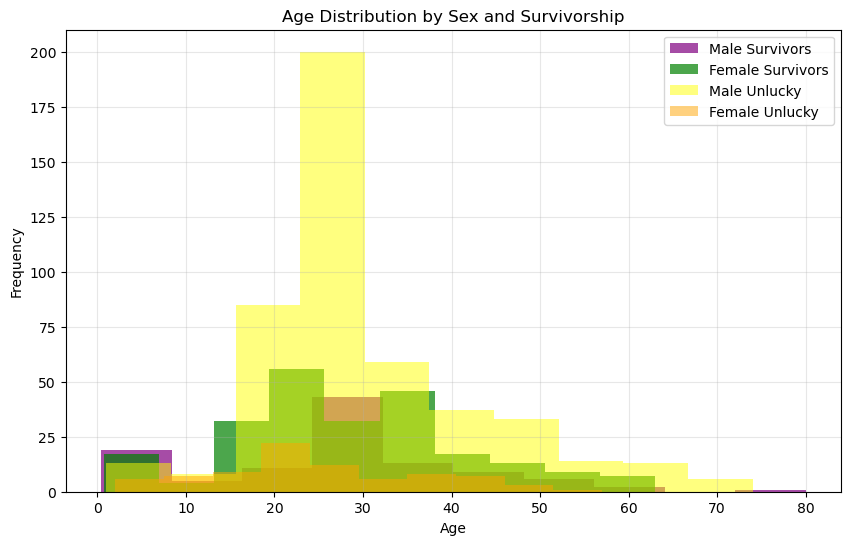

In [294]:
import pandas as pd
import matplotlib.pyplot as plt

pp_df = pd.read_csv('titanic.csv')

survivors_df = pp_df[pp_df["Survived"] == 1][["Age", "Name", "Sex"]]
non_survivors_df = pp_df[pp_df["Survived"] == 0][["Age", "Name", "Sex"]]

print("Survivors DataFrame:")
print(survivors_df.head())

print("\nNon-Survivors DataFrame:")
print(non_survivors_df.head())

plt.figure(figsize=(10, 6))

plt.hist(
    survivors_df[survivors_df["Sex"] == 1]["Age"].dropna(),
    alpha=0.7,
    label="Male Survivors",
    color="purple",
    histtype="stepfilled",
)
plt.hist(
    survivors_df[survivors_df["Sex"] == 0]["Age"].dropna(),
    alpha=0.7,
    label="Female Survivors",
    color="green",
    histtype="stepfilled",
)
plt.hist(
    non_survivors_df[non_survivors_df["Sex"] == 1]["Age"].dropna(),
    alpha=0.5,
    label="Male Unlucky",
    color="yellow",
    histtype="stepfilled",
)
plt.hist(
    non_survivors_df[non_survivors_df["Sex"] == 0]["Age"].dropna(),
    alpha=0.5,
    label="Female Unlucky",
    color="orange",
    histtype="stepfilled",
)

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution by Sex and Survivorship")
plt.legend()
plt.grid(alpha=0.3)

plt.show()


### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [269]:
label = ['Survived']
features = ['Sex', 'Age', 'Pclass']

titanic_df = pd.read_csv('titanic.csv') 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(titanic_df[features], titanic_df[label], test_size = 0.2)


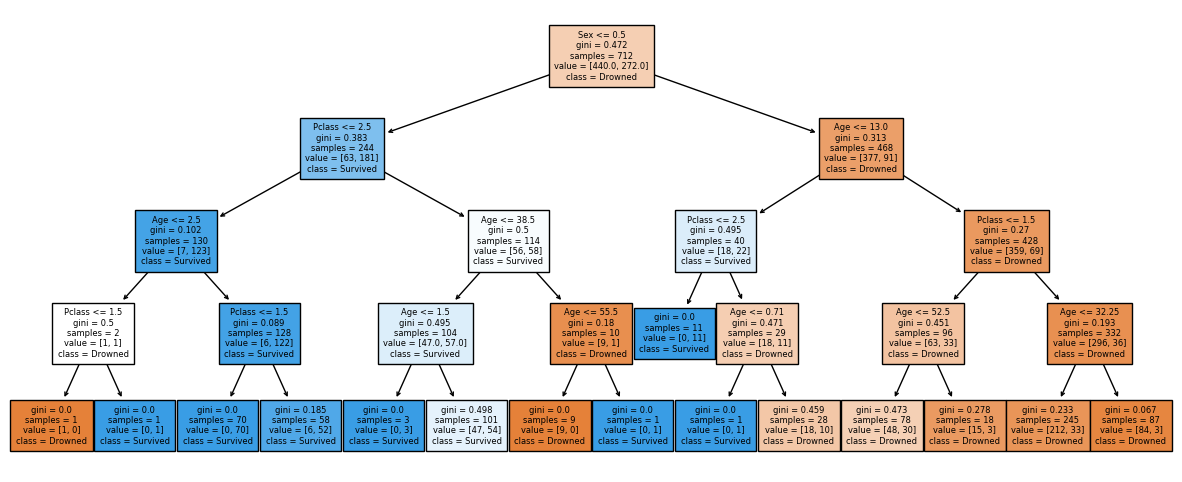

In [220]:
from sklearn.tree import DecisionTreeClassifier , plot_tree

tree_clf = DecisionTreeClassifier(max_depth = 4)
tree_clf.fit(X_train, y_train)

fig, ax = plt.subplots(1,1, figsize = (15,6))
plot_tree(tree_clf, feature_names = features, class_names = ['Drowned', 'Survived'],
          filled = True, fontsize = 6)
plt.show()

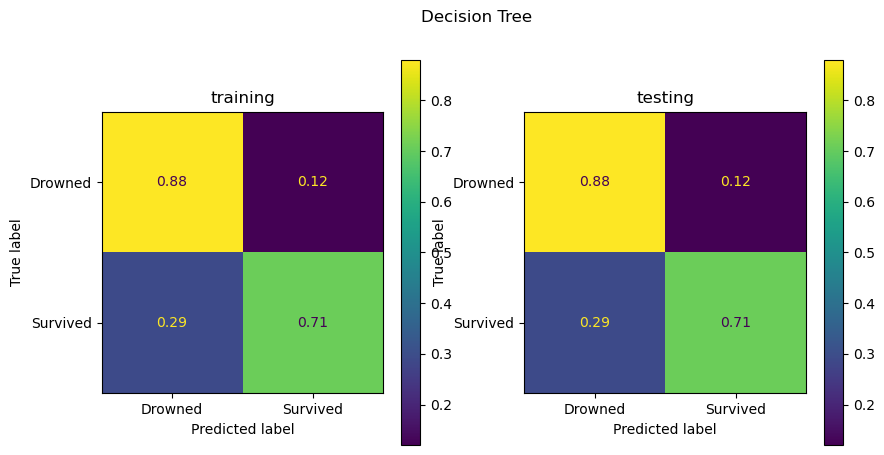

In [258]:
from sklearn.metrics import ConfusionMatrixDisplay

y_tree_train = tree_clf.predict(X_train)
y_tree_test = tree_clf.predict(X_test)

fig, ax = plt.subplots(1,2, figsize = (10, 5))

ConfusionMatrixDisplay.from_predictions(y_train, y_tree_train, 
                                        normalize = 'true',
                                        display_labels = ['Drowned', 'Survived'],
                                        ax = ax[0])

ConfusionMatrixDisplay.from_predictions(y_train, y_tree_train, 
                                        normalize = 'true',
                                        display_labels = ['Drowned', 'Survived'], 
                                        ax = ax[1])

ax[0].set_title('training')
ax[1].set_title('testing')
fig.suptitle('Decision Tree')
plt.show()

#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - 


Which models did you fit and which worked better?
 
 - 

In [ ]:
#They are equal to each other. 
#I did the standard scaler and the decision tree. 
#The decision tree worked best because it was better at visualizing the data. 

In [228]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)

ys_train = y_train.values.ravel()
ys_test = y_test.values.ravel()

knn_clf = KNeighborsClassifier(n_neighbors = 15)
knn_clf.fit(Xs_train, ys_train)

KNeighborsClassifier(n_neighbors=15)

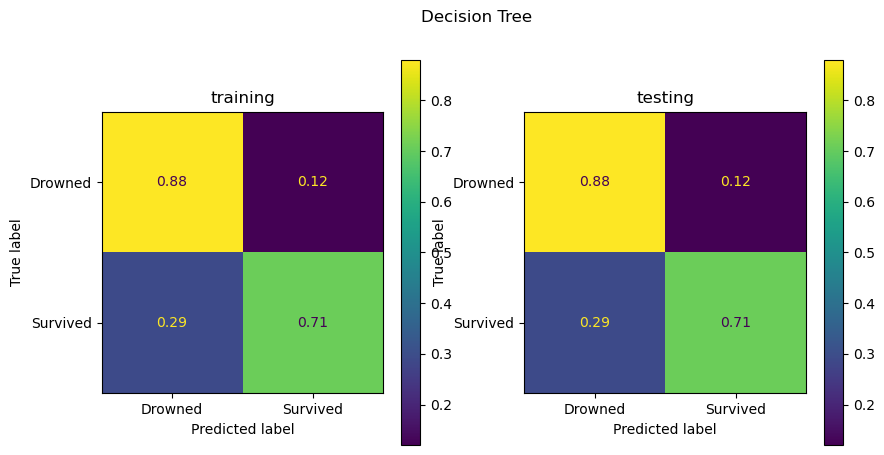

In [260]:
y_knn_train = knn_clf.predict(Xs_train)
y_knn_test = knn_clf. predict(Xs_test)

fig, ax = plt.subplots(1,2, figsize = (10, 5))

ConfusionMatrixDisplay.from_predictions(y_train, y_tree_train, 
                                        normalize = 'true',
                                        display_labels = ['Drowned', 'Survived'],
                                        ax = ax[0])

ConfusionMatrixDisplay.from_predictions(y_train, y_tree_train, 
                                        normalize = 'true',
                                        display_labels = ['Drowned', 'Survived'], 
                                        ax = ax[1])

ax[0].set_title('training')
ax[1].set_title('testing')
fig.suptitle('Decision Tree')
plt.show()